### Wine Classification

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import requests
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier, RandomForestClassifier, GradientBoostingClassifier

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, PRCurve


#### Preparing Data

In [2]:
red_df = pd.read_csv('winequality-red.csv',sep=';')
white_df = pd.read_csv('winequality-white.csv',sep=';')

In [3]:
with open('winequality.names','r') as file:
    print(file.read())

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [4]:
red_df['type'] = 'red'
white_df['type'] = 'white'

In [5]:
df = red_df.append(white_df,ignore_index=True)
df.head()

/var/folders/1s/stcy42l14bd01cnvp2y2xhzr0000gn/T/ipykernel_23702/736621013.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = red_df.append(white_df,ignore_index=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Binary Classification & EDA

In [7]:
#Start with binary classification then move to multiclass later
df['quality'].value_counts()

def binary_class(score):
    if score <= 5:
        return 0
    #low to average wines
    elif score >= 6:
        return 1
    #good to great wines
    
df['binary_class'] = df['quality'].apply(binary_class)

In [8]:
df['binary_class'].value_counts()
#Not super balanced classes but let's see what happens

1    4113
0    2384
Name: binary_class, dtype: int64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

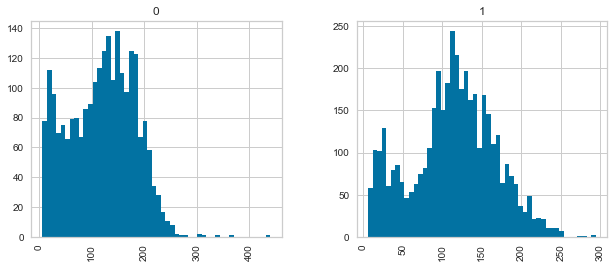

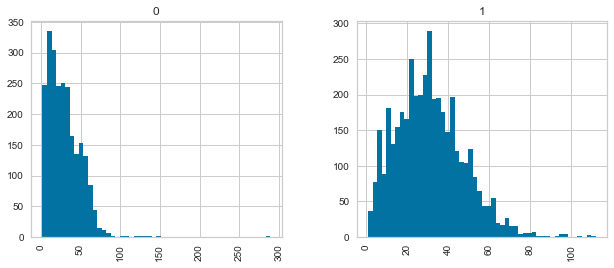

In [9]:
df.hist(column='total sulfur dioxide', by='binary_class', bins=50, figsize=(10,4))
df.hist(column='free sulfur dioxide', by='binary_class', bins=50, figsize=(10,4))

The two sulfur dioxide features have a very wide range, so we might need to scale them or remove outliers.

In [10]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

X = df[features]
y = df['binary_class']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xb_train.shape, Xb_test.shape, yb_train.shape, yb_test.shape

((5197, 11), (1300, 11), (5197,), (1300,))

#### KNearest Neighbors

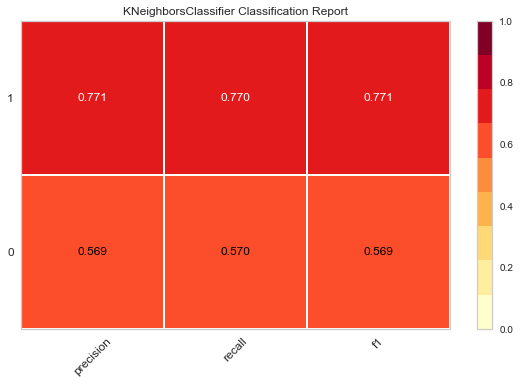

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [11]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.class_counts_ = 2
kNN.fit(Xb_train, yb_train)

viz = ClassificationReport(kNN, is_fitted=True)
viz.score(Xb_test,yb_test)
viz.show()

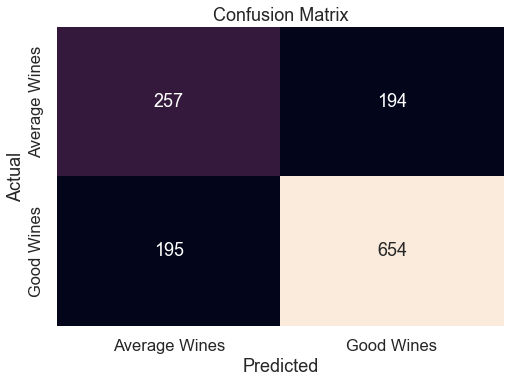

In [12]:
yb_pred_class = kNN.predict(Xb_test)

cm = confusion_matrix(yb_test, yb_pred_class)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Average Wines', 'Good Wines'])
ax.yaxis.set_ticklabels(['Average Wines', 'Good Wines'])
plt.show()

Let's see if removing outliers using total sulfur dioxide will help.

In [13]:
Xb_train[Xb_train['total sulfur dioxide']>300]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1924,7.5,0.27,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5
4253,6.9,0.40,0.22,5.95,0.081,76.0,303.0,0.99705,3.40,0.57,9.4
3726,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5
3530,7.1,0.49,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0


In [14]:
outliers_train = Xb_train['total sulfur dioxide'] > 300

Xb_train_no_outliers = Xb_train[~outliers_train]
yb_train_no_outliers = yb_train[~outliers_train]

outliers_test = Xb_test['total sulfur dioxide'] > 300

Xb_test_no_outliers = Xb_test[~outliers_test]
yb_test_no_outliers = yb_test[~outliers_test]

Xb_test_no_outliers.shape, Xb_train_no_outliers.shape, yb_test_no_outliers.shape, yb_train_no_outliers.shape

((1298, 11), (5193, 11), (1298,), (5193,))

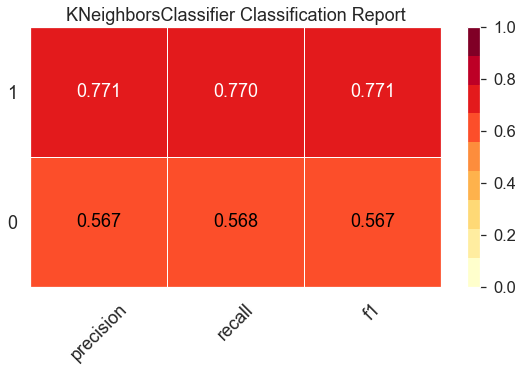

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [15]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.class_counts_ = 2
kNN.fit(Xb_train_no_outliers, yb_train_no_outliers)

viz = ClassificationReport(kNN, is_fitted=True)
viz.score(Xb_test_no_outliers,yb_test_no_outliers)
viz.show()

That didn't seem to help much. Trying again with MinMaxScaler!

In [16]:
scaler = MinMaxScaler()
scaled_free_sulfur_dioxide = scaler.fit_transform(Xb_train[['free sulfur dioxide']])
scaled_total_sulfur_dioxide	= scaler.fit_transform(Xb_train[['total sulfur dioxide']])
Xb_train_scaled = Xb_train.copy()
Xb_train_scaled['free sulfur dioxide'] = scaled_free_sulfur_dioxide
Xb_train_scaled['total sulfur dioxide'] = scaled_total_sulfur_dioxide

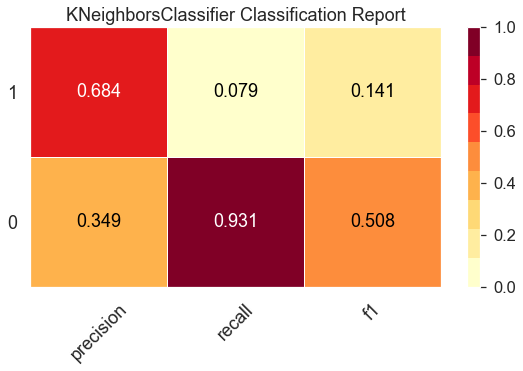

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [17]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.class_counts_ = 2
kNN.fit(Xb_train_scaled, yb_train)

viz = ClassificationReport(kNN, is_fitted=True)
viz.score(Xb_test,yb_test)
viz.show()

That definitely didn't help! Let's stick with our original values and try some other models.

#### Multiclass KNearest Neighbors

In [18]:
#Choosing classes that give us more balance
def multi_class(score):
    if score <= 5:
        return 0
    #bad to average wines
    elif score == 6:
        return 1
    #good wines
    elif score >= 7:
        return 2
    #great wines

df['multi_class'] = df['quality'].apply(multi_class)

In [19]:
ym = df['multi_class']
ym.value_counts()

1    2836
0    2384
2    1277
Name: multi_class, dtype: int64

In [20]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X, ym, test_size=0.2, random_state=42)

Xm_train.shape, Xm_test.shape, ym_train.shape, ym_test.shape

((5197, 11), (1300, 11), (5197,), (1300,))

In [21]:
#What is the optimal k value?

from sklearn.model_selection import cross_val_score

k_values = range(1, 20, 2)

# Use cross-validation to evaluate each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    multiclass_scores = cross_val_score(knn, Xm_train, ym_train, cv=4, scoring='accuracy')
    #binary_scores = cross_val_score(knn, Xb_train, yb_train, cv=5, scoring='accuracy')
    print(f'k={k}, Mean Accuracy: {multiclass_scores.mean()}')
    #print(f'k={k}, Mean Accuracy: {binary_scores.mean()}')

k=1, Mean Accuracy: 0.5914950849766092
k=3, Mean Accuracy: 0.525687807188962
k=5, Mean Accuracy: 0.5122173861550305
k=7, Mean Accuracy: 0.5131801089595547
k=9, Mean Accuracy: 0.5035561378575236
k=11, Mean Accuracy: 0.5029808432522058
k=13, Mean Accuracy: 0.49239636998874875
k=15, Mean Accuracy: 0.4933580564931604
k=17, Mean Accuracy: 0.4991348374489252
k=19, Mean Accuracy: 0.501442825842364


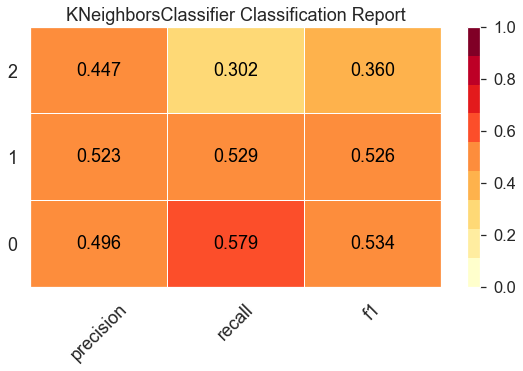

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [22]:
kNN = KNeighborsClassifier(n_neighbors=7)
kNN.class_counts_ = 3
kNN.fit(Xm_train, ym_train)

viz = ClassificationReport(kNN, is_fitted=True, zero_division=1)
viz.score(Xm_test,ym_test)
viz.show()

### Support Vector Machines

/Users/Emi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Emi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


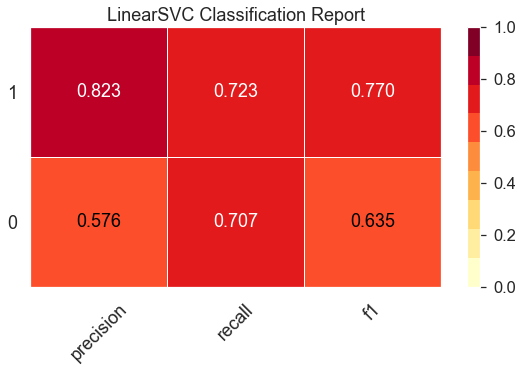

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [23]:
svc = LinearSVC(max_iter=10000)
svc.fit(Xb_train, yb_train)

viz= ClassificationReport(svc, classes=['0', '1'])
viz.fit(Xb_train, yb_train)
viz.score(Xb_test, yb_test)
viz.show()

/Users/Emi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Emi/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


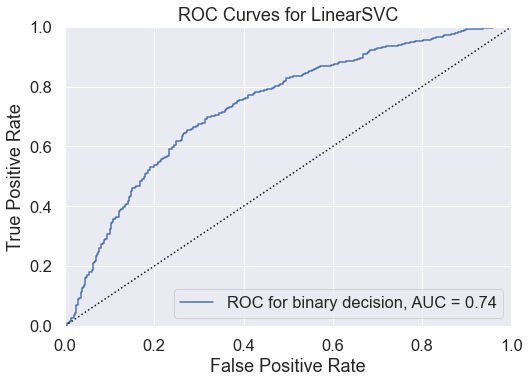

<AxesSubplot:title={'center':'ROC Curves for LinearSVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [24]:
model = LinearSVC()
model.fit(Xb_train, yb_train)

model.target_type_ = 'binary'

viz = ROCAUC(model, classes=[0,1], binary=True)
viz.score(Xb_test, yb_test)
viz.show()

This looks like a pretty good AUC score and curve, but could be better.

/Users/Emi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Emi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


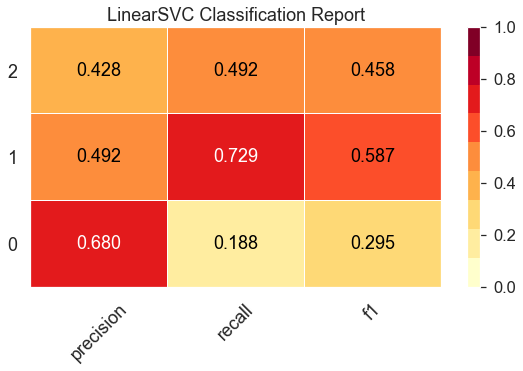

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [25]:
svc = LinearSVC(max_iter=10000)
svc.fit(Xm_train, ym_train)

viz = ClassificationReport(svc, classes=['0','1','2'])
viz.fit(Xm_train, ym_train)
viz.score(Xm_test, ym_test)
viz.show()

#### Logistic Regression

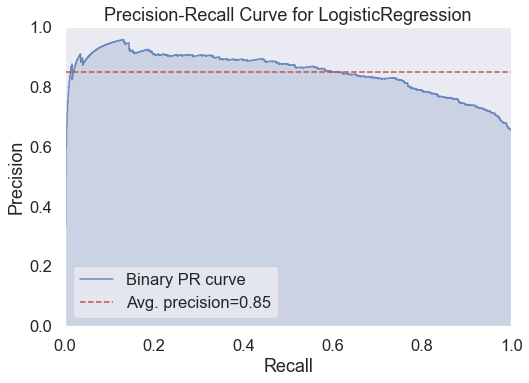

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [26]:
viz = PRCurve(
    LogisticRegression(max_iter=10000)
)

viz.fit(Xb_train,yb_train)
viz.score(Xb_test,yb_test)
viz.show()

/Users/Emi/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


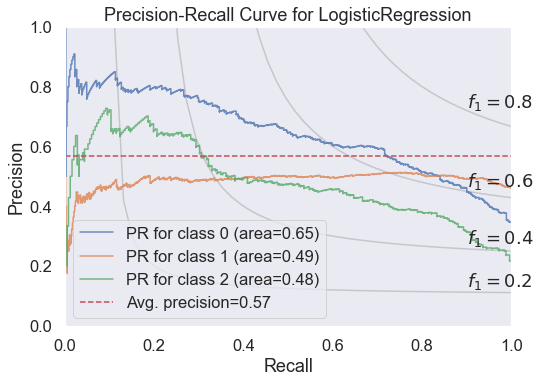

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [27]:
viz = PRCurve(
    LogisticRegression(max_iter=10000), per_class=True,
    fill_area=False, iso_f1_curves=True,
)

viz.fit(Xm_train,ym_train)
viz.score(Xm_test,ym_test)
viz.show()

These curves are not convex to the lower right, so it looks like our multiclass logistic regression model is performing pretty poorly. Our average precision score is much lower than for our binary logistic regression.

#### Naive Bayes

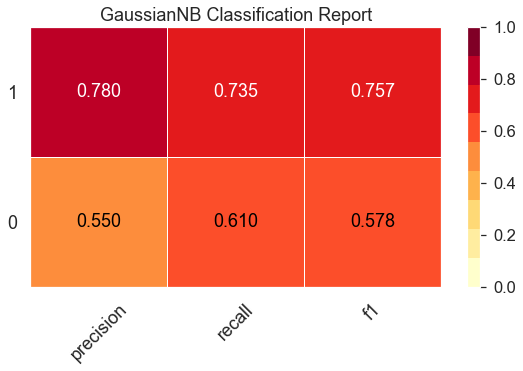

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [28]:
viz = ClassificationReport(GaussianNB())

viz.fit(Xb_train, yb_train)
viz.score(Xb_test, yb_test)
viz.show()

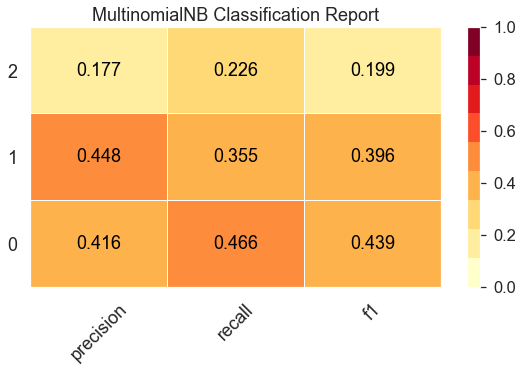

<AxesSubplot:title={'center':'MultinomialNB Classification Report'}>

In [29]:
viz = ClassificationReport(MultinomialNB())

viz.fit(Xm_train, ym_train)
viz.score(Xm_test, ym_test)
viz.show()

#### Decision Trees

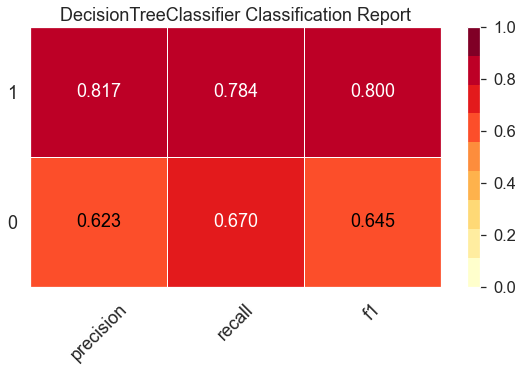

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [30]:
viz = ClassificationReport(DecisionTreeClassifier())

viz.fit(Xb_train, yb_train)
viz.score(Xb_test, yb_test)
viz.show()

Decision Tree seems to be the best performing model!

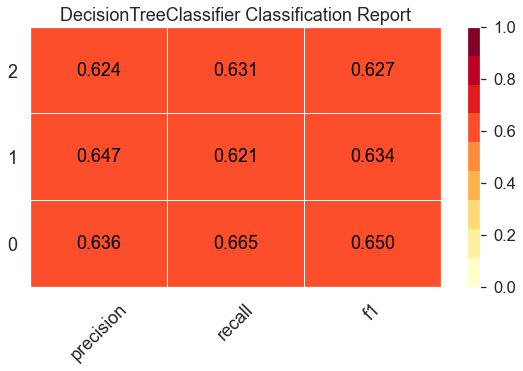

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [31]:
viz = ClassificationReport(DecisionTreeClassifier())

viz.fit(Xm_train, ym_train)
viz.score(Xm_test, ym_test)
viz.show()

#### Ensemble Methods

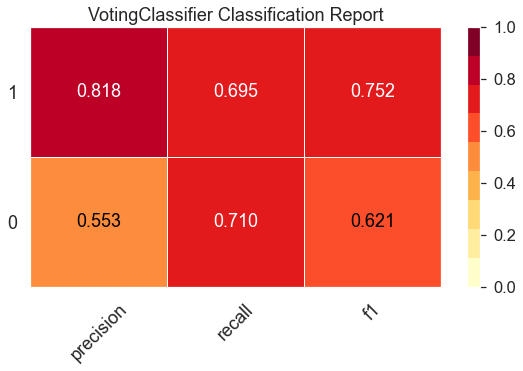

<AxesSubplot:title={'center':'VotingClassifier Classification Report'}>

In [32]:
model = VotingClassifier(
    estimators = [
        ('logistic', LogisticRegression(max_iter=10000)),
        ('bayes', GaussianNB()),
    ], voting ='hard'
)

viz = ClassificationReport(model)
viz.fit(Xb_train, yb_train)
viz.score(Xb_test, yb_test)
viz.show()

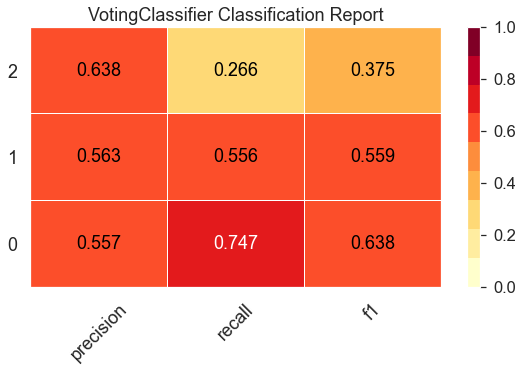

<AxesSubplot:title={'center':'VotingClassifier Classification Report'}>

In [33]:
model = VotingClassifier(
    estimators = [
        ('logistic', LogisticRegression(max_iter=10000)),
        ('bayes', GaussianNB()),
    ], voting ='hard'
)

viz = ClassificationReport(model)
viz.fit(Xm_train, ym_train)
viz.score(Xm_test, ym_test)
viz.show()

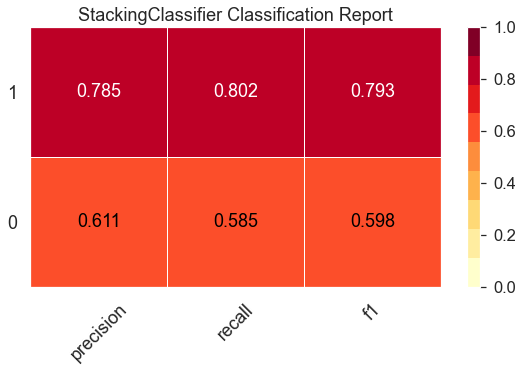

<AxesSubplot:title={'center':'StackingClassifier Classification Report'}>

In [34]:
model = StackingClassifier(
    estimators = [
        ('logistic', LogisticRegression(max_iter=10000)),
        ('bayes', GaussianNB()),
    ], final_estimator = LinearSVC()
)

viz = ClassificationReport(model)
viz.fit(Xb_train, yb_train)
viz.score(Xb_test, yb_test)
viz.show()

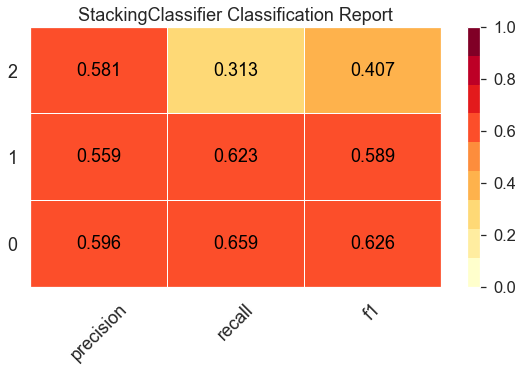

<AxesSubplot:title={'center':'StackingClassifier Classification Report'}>

In [35]:
model = StackingClassifier(
    estimators = [
        ('logistic', LogisticRegression(max_iter=10000)),
        ('bayes', GaussianNB()),
    ], final_estimator = LinearSVC()
)

viz = ClassificationReport(model)
viz.fit(Xm_train, ym_train)
viz.score(Xm_test, ym_test)
viz.show()

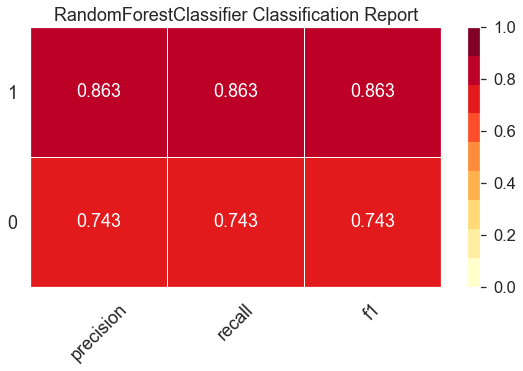

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [36]:
model = RandomForestClassifier()

viz = ClassificationReport(model)
viz.fit(Xb_train, yb_train)
viz.score(Xb_test, yb_test)
viz.show()

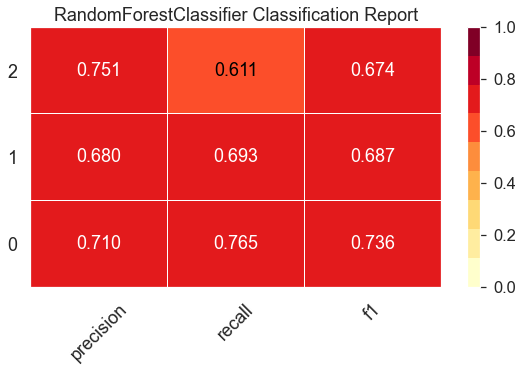

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [37]:
model = RandomForestClassifier()

viz = ClassificationReport(model)
viz.fit(Xm_train, ym_train)
viz.score(Xm_test, ym_test)
viz.show()

#### Gradient Boosting

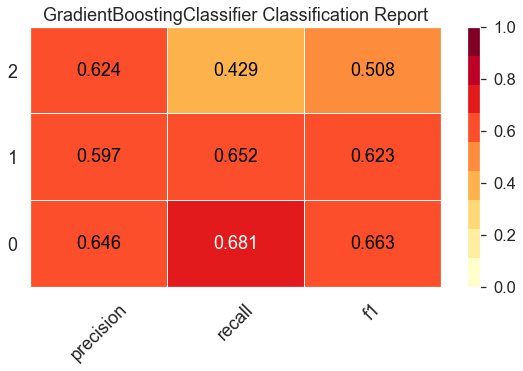

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [38]:
model = GradientBoostingClassifier()

viz = ClassificationReport(model)
viz.fit(Xm_train, ym_train)
viz.score(Xm_test, ym_test)
viz.show()

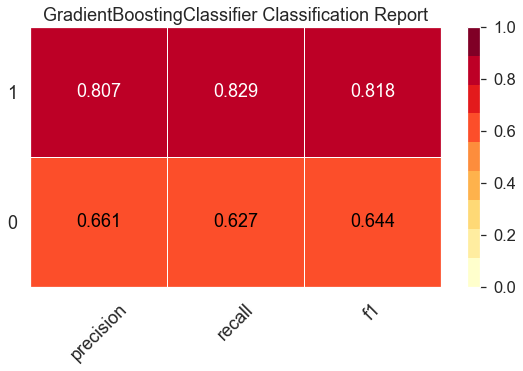

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [39]:
model = GradientBoostingClassifier()

viz = ClassificationReport(model)
viz.fit(Xb_train, yb_train)
viz.score(Xb_test, yb_test)
viz.show()

#### Summary
- Random Forest is the best model for this data in its current state. This could simply be due to the dataset having a lot of noise or irrelevant features, since Random Forest is more robust to these limitations compared to other models.
- Binary classification seems to be better for this data than multiclassification. However, we may have selected the wrong number of classes for multiclassification. I tried to test out different class numbers and picked 3, as it gives us more balanced classes than 4, and more classes than that seemed inappropriate for the distribution of wine quality scores.
- Most of the binary classification models seem to be better at predicting good wines than bad wines. I imagine if we were trying to create a wine recommendation tool, individuals would care more about identifying great wines than average or bad wines. However, the model might be able to better predict bad wines if the classes were more balanced.
- I'm unsure if there's a specific reason why the dataset creators separated white and red wines. It would be interesting to rerun this data for the separate dataframes to see if model scores change.

In [40]:
from sklearn.metrics import f1_score

classifiers = [KNeighborsClassifier(), SVC(), LogisticRegression(max_iter=10000), RandomForestClassifier(), DecisionTreeClassifier()]

for model in classifiers:
    model.fit(Xb_train, yb_train)
    yb_pred = model.predict(Xb_test)
    print(model)
    print(f1_score(yb_test, yb_pred, average='weighted'))

KNeighborsClassifier()
0.6720467152264924
SVC()
0.5495966872912118
LogisticRegression(max_iter=10000)
0.7237890801605286
RandomForestClassifier()
0.8206282323672016
DecisionTreeClassifier()
0.750903532884603
